In [202]:
import json
import pandas as pd
import numpy
import matplotlib.pyplot  as plt
import seaborn as sns 
import time
import re

In [107]:
#set working directory 
import os
os.chdir("C:/Users/Fu's Computer/Desktop/MBusA Module 5/Business Case Study/yelp_dataset (1)")
os.getcwd()

"C:\\Users\\Fu's Computer\\Desktop\\MBusA Module 5\\Business Case Study\\yelp_dataset (1)"

# Data preparation

In [108]:
#read in Other.csv as pandas df 
business = pd.read_csv("Other_V2.csv")
business.info()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39055 entries, 0 to 39054
Data columns (total 47 columns):
Unnamed: 0                    39055 non-null int64
business_id                   39055 non-null object
name                          39055 non-null object
address                       38487 non-null object
city                          39055 non-null object
state                         39055 non-null object
postal_code                   38965 non-null object
latitude                      39055 non-null float64
longitude                     39055 non-null float64
stars                         39055 non-null float64
review_count                  39055 non-null int64
is_open                       39055 non-null int64
categories                    39055 non-null object
hours                         29943 non-null object
GoodForKids                   26107 non-null object
RestaurantsReservations       26410 non-null object
GoodForMeal                   15477 non-null object
Busines

In [109]:
#shape of business df 
business.shape

(39055, 47)

In [6]:
#read in reviews.json as pandas df 
review1 = pd.read_pickle("C:/Users/Fu's Computer/Desktop/MBusA Module 5/Business Case Study/yelp_dataset (1)/review1.pkl")
review2 = pd.read_pickle("C:/Users/Fu's Computer/Desktop/MBusA Module 5/Business Case Study/yelp_dataset (1)/review2.pkl")
review3 = pd.read_pickle("C:/Users/Fu's Computer/Desktop/MBusA Module 5/Business Case Study/yelp_dataset (1)/review3.pkl")
review4 = pd.read_pickle("C:/Users/Fu's Computer/Desktop/MBusA Module 5/Business Case Study/yelp_dataset (1)/review4.pkl")

review1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671475 entries, 0 to 1671474
Data columns (total 9 columns):
review_id      1671475 non-null object
user_id        1671475 non-null object
business_id    1671475 non-null object
stars          1671475 non-null float64
useful         1671475 non-null int64
funny          1671475 non-null int64
cool           1671475 non-null int64
text           1671475 non-null object
date           1671475 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 114.8+ MB


In [105]:
## check missing values
review2.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [8]:
review1['business_id'].isin(business['business_id']).value_counts()

False    1060609
True      610866
Name: business_id, dtype: int64

In [104]:
## check duplicates of review_id
review1.review_id.duplicated().sum()

0

In [110]:
## merge business table and review table
restaurants_reviews1 = pd.merge(business, review1, on='business_id', how='inner')
restaurants_reviews2 = pd.merge(business, review2, on='business_id', how='inner')
restaurants_reviews3 = pd.merge(business, review3, on='business_id', how='inner')
restaurants_reviews4 = pd.merge(business, review4, on='business_id', how='inner')

In [111]:
# how many rows are there 
restaurants_reviews1.shape
#restaurants_reviews2.shape
#restaurants_reviews3.shape
#restaurants_reviews4.shape

(610866, 55)

In [132]:
restaurants_reviews = restaurants_reviews1.append(restaurants_reviews2, ignore_index = True) 

In [133]:
restaurants_reviews = restaurants_reviews.append(restaurants_reviews3, ignore_index = True) 

In [134]:
restaurants_reviews = restaurants_reviews.append(restaurants_reviews4, ignore_index = True) 

In [135]:
# restaurant reviews contains the same amount of businesses as business df
len(restaurants_reviews['business_id'].unique().tolist())

39054

In [136]:
restaurants_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2423139 entries, 0 to 2423138
Data columns (total 55 columns):
Unnamed: 0                    int64
business_id                   object
name                          object
address                       object
city                          object
state                         object
postal_code                   object
latitude                      float64
longitude                     float64
stars_x                       float64
review_count                  int64
is_open                       int64
categories                    object
hours                         object
GoodForKids                   object
RestaurantsReservations       object
GoodForMeal                   object
BusinessParking               object
Caters                        object
NoiseLevel                    object
RestaurantsTableService       object
RestaurantsTakeOut            object
RestaurantsPriceRange2        object
OutdoorSeating                object

In [137]:
## check missing values
restaurants_reviews.isnull().sum()

Unnamed: 0                          0
business_id                         0
name                                0
address                          8255
city                                0
state                               0
postal_code                      1095
latitude                            0
longitude                           0
stars_x                             0
review_count                        0
is_open                             0
categories                          0
hours                          144210
GoodForKids                    284052
RestaurantsReservations        265826
GoodForMeal                    591533
BusinessParking                 68324
Caters                         295906
NoiseLevel                     347251
RestaurantsTableService       1463814
RestaurantsTakeOut             110572
RestaurantsPriceRange2          36962
OutdoorSeating                 206176
BikeParking                    183496
Ambience                       292690
HasTV       

In [138]:
#drop rows where review id is missing
restaurants_reviews.dropna(subset=['review_id'],inplace=True)

In [139]:
## check missing values
restaurants_reviews.isnull().sum()

Unnamed: 0                          0
business_id                         0
name                                0
address                          8255
city                                0
state                               0
postal_code                      1095
latitude                            0
longitude                           0
stars_x                             0
review_count                        0
is_open                             0
categories                          0
hours                          144210
GoodForKids                    284052
RestaurantsReservations        265826
GoodForMeal                    591533
BusinessParking                 68324
Caters                         295906
NoiseLevel                     347251
RestaurantsTableService       1463814
RestaurantsTakeOut             110572
RestaurantsPriceRange2          36962
OutdoorSeating                 206176
BikeParking                    183496
Ambience                       292690
HasTV       

In [140]:
## check shape of df  (34% do not have a cuisine label)
restaurants_reviews.shape

(2423139, 55)

In [141]:
## update column names
restaurants_reviews.rename(columns={'stars_x':'avg_star','stars_y':'review_star'}, inplace=True)

In [142]:
## update date column to datetime format
restaurants_reviews['date'] =  pd.to_datetime(restaurants_reviews['date'])

In [143]:
#check data type
restaurants_reviews.dtypes

Unnamed: 0                             int64
business_id                           object
name                                  object
address                               object
city                                  object
state                                 object
postal_code                           object
latitude                             float64
longitude                            float64
avg_star                             float64
review_count                           int64
is_open                                int64
categories                            object
hours                                 object
GoodForKids                           object
RestaurantsReservations               object
GoodForMeal                           object
BusinessParking                       object
Caters                                object
NoiseLevel                            object
RestaurantsTableService               object
RestaurantsTakeOut                    object
Restaurant

In [144]:
#drop some sparse columns in the attribute df
restaurants_reviews.drop(['Unnamed: 0'], axis=1, inplace=True)

# Analysing trends in each cuisine 

In [145]:
#drop rows where cuisine is missing
review_cuisine = restaurants_reviews.dropna(subset=['cuisine'])

In [146]:
#set date as index 
review_cuisine = review_cuisine.set_index('date')

In [147]:
review_cuisine.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,avg_star,review_count,...,Smoking,cuisine,sub_cuisine,review_id,user_id,review_star,useful,funny,cool,text
date,,,,,,,,,,,,,,,,,,,,,
2014-02-24 02:51:56,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,...,NaN,Japanese,Sushi Bars,F7POrJsNbhu493DSTMPXjw,nsS4oDfOsl20QdWc6XcOkw,2.0,1,0,0,"Husband was craving Chicken Teriyaki & gyoza, ..."
2014-07-13 20:28:18,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,...,NaN,Japanese,Sushi Bars,c-6aA9Bd7JxpmMroRoas9A,bK4Y_GZUoAUTXIrmeEUGYw,4.0,0,0,1,Went there Saturday noon they open at 12pm but...
2018-05-09 00:39:36,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,...,NaN,Japanese,Sushi Bars,P_MV_lMQjLIO9R7M_KIuMg,sbbB6Y4yIZIInvt0LFYYew,2.0,1,0,0,Went to this restaurant on Saturday as I had a...


In [148]:
reviews_only = review_cuisine[['business_id','name','address','city','state','avg_star','review_count','categories','cuisine','review_id','user_id','review_star','useful','funny','cool','text']]

In [35]:
reviews_only.shape

(1596100, 16)

In [36]:
# check min and max date of reviews
print (reviews_only.index.min())
print (reviews_only.index.max())

2004-10-12 10:13:32
2018-11-14 18:10:58


In [37]:
#test = reviews_only.groupby(['cuisine','date']).review_id.value_counts()

In [38]:
#set number of reviews in each row to 1 
reviews_only.loc[:,'number of reviews'] = int(1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [39]:
# show total number of reviews each year
test2 = reviews_only.groupby([pd.Grouper(level ='date',freq='A')])['number of reviews'].count()
test2

date
2004-12-31         4
2005-12-31       275
2006-12-31      1431
2007-12-31      5609
2008-12-31     15316
2009-12-31     26709
2010-12-31     47668
2011-12-31     74816
2012-12-31     88490
2013-12-31    119339
2014-12-31    169794
2015-12-31    226507
2016-12-31    256217
2017-12-31    287885
2018-12-31    276040
Freq: A-DEC, Name: number of reviews, dtype: int64

In [40]:
reviews_only.shape

(1596100, 17)

In [41]:
# create column that shows total number of reviews between a date range
reviews2004 = reviews_only.loc['2004-01-01':'2004-12-31']
reviews2005 = reviews_only.loc['2005-01-01':'2005-12-31']
reviews2006 = reviews_only.loc['2006-01-01':'2006-12-31']
reviews2007 = reviews_only.loc['2007-01-01':'2007-12-31']
reviews2008 = reviews_only.loc['2008-01-01':'2008-12-31']
reviews2009 = reviews_only.loc['2009-01-01':'2009-12-31']
reviews2010 = reviews_only.loc['2010-01-01':'2010-12-31']
reviews2011 = reviews_only.loc['2011-01-01':'2011-12-31']
reviews2012 = reviews_only.loc['2012-01-01':'2012-12-31']
reviews2013 = reviews_only.loc['2013-01-01':'2013-12-31']
reviews2014 = reviews_only.loc['2014-01-01':'2014-12-31']
reviews2015 = reviews_only.loc['2015-01-01':'2015-12-31']
reviews2016 = reviews_only.loc['2016-01-01':'2016-12-31']
reviews2017 = reviews_only.loc['2017-01-01':'2017-12-31']
reviews2018 = reviews_only.loc['2018-01-01':'2018-12-31']

In [42]:
# create column that shows total number of reviews between a date range
reviews2004.loc[:,'total reviews in cal year'] = 4
reviews2005.loc[:,'total reviews in cal year'] = 275
reviews2006.loc[:,'total reviews in cal year'] = 1431
reviews2007.loc[:,'total reviews in cal year'] = 5609
reviews2008.loc[:,'total reviews in cal year'] = 15316
reviews2009.loc[:,'total reviews in cal year'] = 26709
reviews2010.loc[:,'total reviews in cal year'] = 47668
reviews2011.loc[:,'total reviews in cal year'] = 74816
reviews2012.loc[:,'total reviews in cal year'] = 88490
reviews2013.loc[:,'total reviews in cal year'] = 119339
reviews2014.loc[:,'total reviews in cal year'] = 169794
reviews2015.loc[:,'total reviews in cal year'] = 226507
reviews2016.loc[:,'total reviews in cal year'] = 256217
reviews2017.loc[:,'total reviews in cal year'] = 287885
reviews2018.loc[:,'total reviews in cal year'] = 276040

In [43]:
# create column that shows total number of reviews between a date range
reviews_only = reviews2004.append(reviews2005) 
reviews_only = reviews_only.append(reviews2006)
reviews_only = reviews_only.append(reviews2007)
reviews_only = reviews_only.append(reviews2008)
reviews_only = reviews_only.append(reviews2009)
reviews_only = reviews_only.append(reviews2010)
reviews_only = reviews_only.append(reviews2011)
reviews_only = reviews_only.append(reviews2012)
reviews_only = reviews_only.append(reviews2013)
reviews_only = reviews_only.append(reviews2014)
reviews_only = reviews_only.append(reviews2015)
reviews_only = reviews_only.append(reviews2016)
reviews_only = reviews_only.append(reviews2017)
reviews_only = reviews_only.append(reviews2018)

In [44]:
#check all rows have been appended
reviews_only.shape

(1596100, 18)

In [45]:
#normalise review count by dividing it by total number of reviews in the year
reviews_only.loc[:,'normalised review count'] = reviews_only['number of reviews']/reviews_only['total reviews in cal year']

In [87]:
#seperate out Japanese cuisine
Japanese = reviews_only[reviews_only.cuisine == 'Japanese']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Japanese_yearly = Japanese[data_columns].resample('A').sum()
Japanese_yearly.head(10)

,normalised review count
date,
2005-12-31,0.054545
2006-12-31,0.067086
2007-12-31,0.072919
2008-12-31,0.066532
2009-12-31,0.064510
2010-12-31,0.060376
2011-12-31,0.056552
2012-12-31,0.050706
2013-12-31,0.050880


In [174]:
# Start and end of the date range to extract (remove first few years as they have too few reviews)
start, end = '2007-01-01', '2018-11-14 18:09:01'

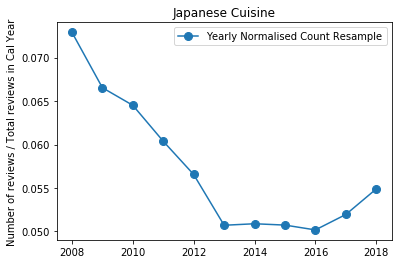

In [88]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Japanese_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Japanese Cuisine');

In [52]:
# Seperate out American cuisine
American = reviews_only[reviews_only.cuisine == 'American']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
American_yearly = American[data_columns].resample('A').sum()
American_yearly.head(10)

,normalised review count
date,
2004-12-31,0.250000
2005-12-31,0.472727
2006-12-31,0.403913
2007-12-31,0.391335
2008-12-31,0.355119
2009-12-31,0.350930
2010-12-31,0.376563
2011-12-31,0.398204
2012-12-31,0.414397


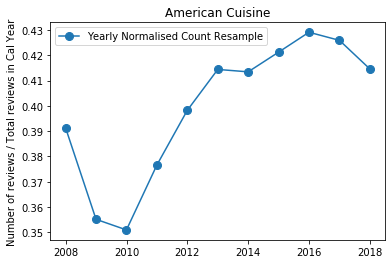

In [89]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(American_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('American Cuisine');

In [56]:
# Seperate out Mexican cuisine
Mexican = reviews_only[reviews_only.cuisine == 'Mexican']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Mexican_yearly = Mexican[data_columns].resample('A').sum()
Mexican_yearly.head(10)

,normalised review count
date,
2004-12-31,0.250000
2005-12-31,0.130909
2006-12-31,0.144654
2007-12-31,0.150472
2008-12-31,0.159311
2009-12-31,0.158711
2010-12-31,0.154233
2011-12-31,0.149620
2012-12-31,0.143598


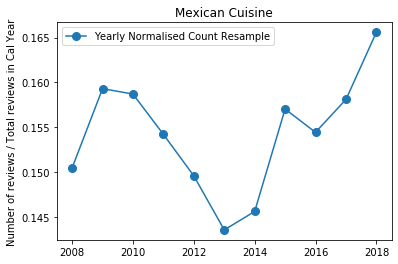

In [90]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Mexican_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Mexican Cuisine');

In [63]:
# Seperate out Italian cuisine
Italian = reviews_only[reviews_only.cuisine == 'Italian']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Italian_yearly = Italian[data_columns].resample('A').sum()
Italian_yearly.head(10)

,normalised review count
date,
2005-12-31,0.138182
2006-12-31,0.122292
2007-12-31,0.126761
2008-12-31,0.132084
2009-12-31,0.148639
2010-12-31,0.139003
2011-12-31,0.135586
2012-12-31,0.137112
2013-12-31,0.137826


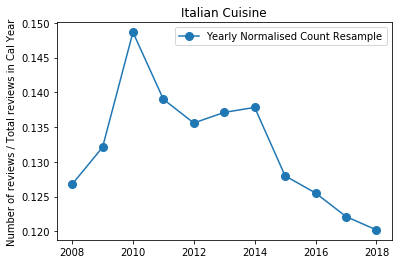

In [91]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Italian_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Italian Cuisine');

In [65]:
# Seperate out 'Japanese and Chinese' cuisine
Japanese_and_Chinese = reviews_only[reviews_only.cuisine == 'Japanese and Chinese']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Japanese_and_Chinese_yearly = Japanese_and_Chinese[data_columns].resample('A').sum()
Japanese_and_Chinese_yearly.head(10)

,normalised review count
date,
2005-12-31,0.003636
2006-12-31,0.007687
2007-12-31,0.004992
2008-12-31,0.004636
2009-12-31,0.004268
2010-12-31,0.004405
2011-12-31,0.006041
2012-12-31,0.006181
2013-12-31,0.005262


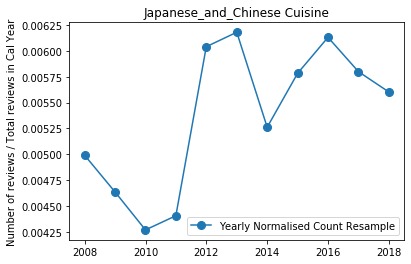

In [92]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Japanese_and_Chinese_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Japanese_and_Chinese Cuisine');

In [67]:
# Seperate out Chinese cuisine
Chinese = reviews_only[reviews_only.cuisine == 'Chinese']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Chinese_yearly = Chinese[data_columns].resample('A').sum()
Chinese_yearly.head(10)

,normalised review count
date,
2004-12-31,0.500000
2005-12-31,0.050909
2006-12-31,0.076171
2007-12-31,0.061687
2008-12-31,0.061831
2009-12-31,0.059643
2010-12-31,0.061698
2011-12-31,0.059199
2012-12-31,0.058176


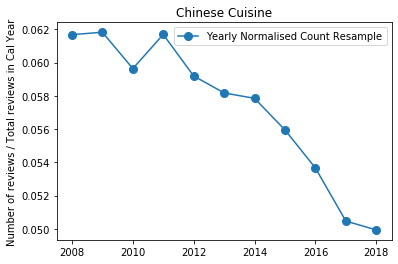

In [93]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Chinese_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Chinese Cuisine');

In [69]:
# Seperate out Thai cuisine
Thai = reviews_only[reviews_only.cuisine == 'Thai']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Thai_yearly = Thai[data_columns].resample('A').sum()
Thai_yearly.head(10)

,normalised review count
date,
2005-12-31,0.050909
2006-12-31,0.036338
2007-12-31,0.038866
2008-12-31,0.046161
2009-12-31,0.042532
2010-12-31,0.043069
2011-12-31,0.042424
2012-12-31,0.038524
2013-12-31,0.036585


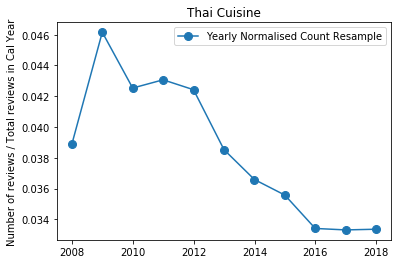

In [94]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Thai_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Thai Cuisine');

In [71]:
# Seperate out French cuisine
French = reviews_only[reviews_only.cuisine == 'French']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
French_yearly = French[data_columns].resample('A').sum()
French_yearly.head(10)

,normalised review count
date,
2006-12-31,0.023760
2007-12-31,0.018720
2008-12-31,0.021677
2009-12-31,0.024112
2010-12-31,0.024377
2011-12-31,0.022589
2012-12-31,0.021697
2013-12-31,0.021091
2014-12-31,0.017663


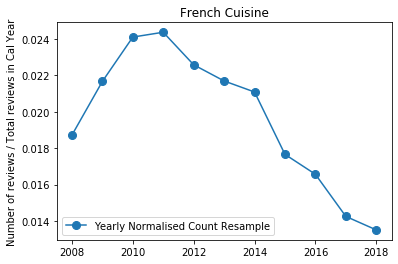

In [95]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(French_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('French Cuisine');

In [73]:
# Seperate out Vietnamese cuisine
Vietnamese = reviews_only[reviews_only.cuisine == 'Vietnamese']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Vietnamese_yearly = Vietnamese[data_columns].resample('A').sum()
Vietnamese_yearly.head(10)

,normalised review count
date,
2005-12-31,0.007273
2006-12-31,0.015374
2007-12-31,0.014263
2008-12-31,0.020567
2009-12-31,0.021491
2010-12-31,0.022447
2011-12-31,0.022803
2012-12-31,0.023257
2013-12-31,0.023404


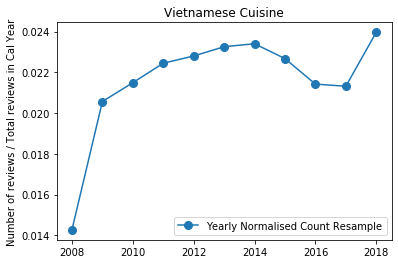

In [96]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Vietnamese_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Vietnamese Cuisine');

In [75]:
# Seperate out Greek cuisine
Greek = reviews_only[reviews_only.cuisine == 'Greek']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Greek_yearly = Greek[data_columns].resample('A').sum()
Greek_yearly.head(10)

,normalised review count
date,
2005-12-31,0.043636
2006-12-31,0.046820
2007-12-31,0.053307
2008-12-31,0.050274
2009-12-31,0.045453
2010-12-31,0.039251
2011-12-31,0.036115
2012-12-31,0.033122
2013-12-31,0.032554


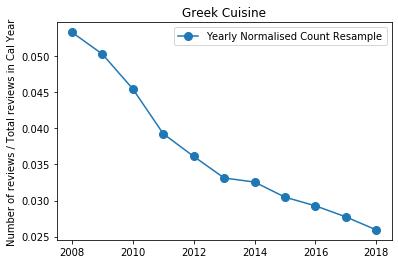

In [97]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Greek_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Greek Cuisine');

In [77]:
# Seperate out Indian cuisine
Indian = reviews_only[reviews_only.cuisine == 'Indian']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Indian_yearly = Indian[data_columns].resample('A').sum()
Indian_yearly.head(10)

,normalised review count
date,
2005-12-31,0.010909
2006-12-31,0.016771
2007-12-31,0.020859
2008-12-31,0.023831
2009-12-31,0.023737
2010-12-31,0.021503
2011-12-31,0.018726
2012-12-31,0.021370
2013-12-31,0.021326


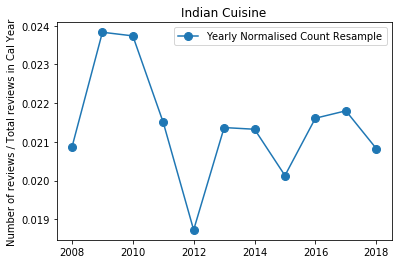

In [98]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Indian_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Indian Cuisine');

In [79]:
# Seperate out Korean cuisine
Korean = reviews_only[reviews_only.cuisine == 'Korean']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Korean_yearly = Korean[data_columns].resample('A').sum()
Korean_yearly.head(10)

,normalised review count
date,
2005-12-31,0.003636
2006-12-31,0.008386
2007-12-31,0.015154
2008-12-31,0.018934
2009-12-31,0.016099
2010-12-31,0.013195
2011-12-31,0.013379
2012-12-31,0.011256
2013-12-31,0.012511


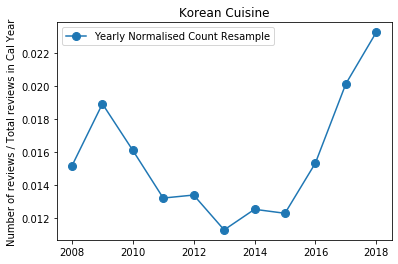

In [99]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Korean_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Korean Cuisine');

In [81]:
# Seperate out Hawaiian cuisine
Hawaiian = reviews_only[reviews_only.cuisine == 'Hawaiian']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Hawaiian_yearly = Hawaiian[data_columns].resample('A').sum()
Hawaiian_yearly.head(10)

,normalised review count
date,
2005-12-31,0.003636
2006-12-31,0.011880
2007-12-31,0.009271
2008-12-31,0.009337
2009-12-31,0.009547
2010-12-31,0.012188
2011-12-31,0.009276
2012-12-31,0.008306
2013-12-31,0.008974


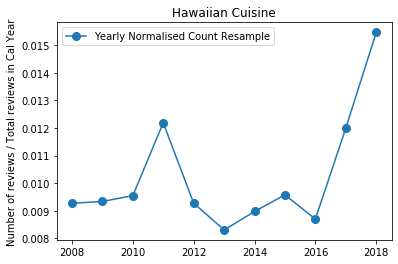

In [100]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Hawaiian_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Hawaiian Cuisine');

In [83]:
# Seperate out African cuisine
African = reviews_only[reviews_only.cuisine == 'African']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
African_yearly = African[data_columns].resample('A').sum()
African_yearly.head(10)

,normalised review count
date,
2006-12-31,0.001398
2007-12-31,0.001605
2008-12-31,0.003069
2009-12-31,0.003781
2010-12-31,0.001448
2011-12-31,0.001510
2012-12-31,0.002125
2013-12-31,0.001341
2014-12-31,0.001437


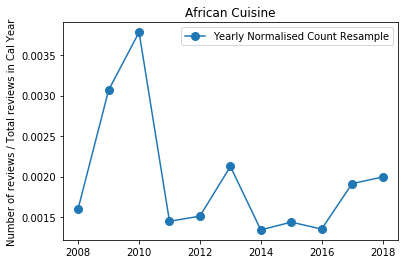

In [101]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(African_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('African Cuisine');

In [85]:
# Seperate out Spanish cuisine
Spanish = reviews_only[reviews_only.cuisine == 'Spanish']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Spanish_yearly = Spanish[data_columns].resample('A').sum()
Spanish_yearly.head(10)

,normalised review count
date,
2005-12-31,0.018182
2006-12-31,0.007687
2007-12-31,0.009093
2008-12-31,0.010185
2009-12-31,0.008836
2010-12-31,0.007552
2011-12-31,0.006897
2012-12-31,0.006159
2013-12-31,0.004860


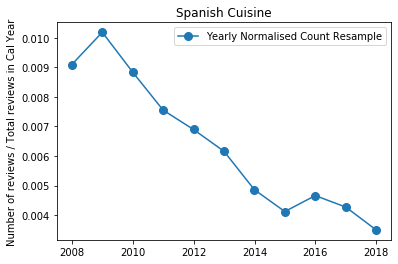

In [102]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Spanish_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Spanish Cuisine');

The cuisines exhibiting trend an upward trend are: Hawaiian, Korean, Mexican

## Analysing trends in sub-cuisine of Hawaiian, Korean, Mexican

In [273]:
#only select relevant columns 
sub_cuisine_analysis = restaurants_reviews[['business_id','name','address','city','state','avg_star','review_count','sub_cuisine','categories','cuisine','review_id','user_id','review_star','useful','funny','cool','text','date']]

In [274]:
#set date as index 
sub_cuisine_analysis = sub_cuisine_analysis.set_index('date')

In [275]:
# check min and max date of reviews
print (sub_cuisine_analysis.index.min())
print (sub_cuisine_analysis.index.max())

2004-10-12 10:13:32
2018-11-14 18:13:16


In [276]:
#set number of reviews in each row to 1 
sub_cuisine_analysis.loc[:,'number of reviews'] = int(1)

In [277]:
# show total number of reviews each year
test2 = sub_cuisine_analysis.groupby([pd.Grouper(level ='date',freq='A')])['number of reviews'].count()
test2

date
2004-12-31         8
2005-12-31       476
2006-12-31      2288
2007-12-31      9168
2008-12-31     24455
2009-12-31     41821
2010-12-31     73486
2011-12-31    115883
2012-12-31    135630
2013-12-31    178911
2014-12-31    254054
2015-12-31    339938
2016-12-31    384427
2017-12-31    435383
2018-12-31    427211
Freq: A-DEC, Name: number of reviews, dtype: int64

In [278]:
# create column that shows total number of reviews between a date range
reviews2004 = sub_cuisine_analysis.loc['2004-01-01':'2004-12-31']
reviews2005 = sub_cuisine_analysis.loc['2005-01-01':'2005-12-31']
reviews2006 = sub_cuisine_analysis.loc['2006-01-01':'2006-12-31']
reviews2007 = sub_cuisine_analysis.loc['2007-01-01':'2007-12-31']
reviews2008 = sub_cuisine_analysis.loc['2008-01-01':'2008-12-31']
reviews2009 = sub_cuisine_analysis.loc['2009-01-01':'2009-12-31']
reviews2010 = sub_cuisine_analysis.loc['2010-01-01':'2010-12-31']
reviews2011 = sub_cuisine_analysis.loc['2011-01-01':'2011-12-31']
reviews2012 = sub_cuisine_analysis.loc['2012-01-01':'2012-12-31']
reviews2013 = sub_cuisine_analysis.loc['2013-01-01':'2013-12-31']
reviews2014 = sub_cuisine_analysis.loc['2014-01-01':'2014-12-31']
reviews2015 = sub_cuisine_analysis.loc['2015-01-01':'2015-12-31']
reviews2016 = sub_cuisine_analysis.loc['2016-01-01':'2016-12-31']
reviews2017 = sub_cuisine_analysis.loc['2017-01-01':'2017-12-31']
reviews2018 = sub_cuisine_analysis.loc['2018-01-01':'2018-12-31']

In [279]:
# create column that shows total number of reviews between a date range
reviews2004.loc[:,'total reviews in cal year'] = 8
reviews2005.loc[:,'total reviews in cal year'] = 476
reviews2006.loc[:,'total reviews in cal year'] = 2288
reviews2007.loc[:,'total reviews in cal year'] = 9168
reviews2008.loc[:,'total reviews in cal year'] = 24455
reviews2009.loc[:,'total reviews in cal year'] = 41821
reviews2010.loc[:,'total reviews in cal year'] = 73486
reviews2011.loc[:,'total reviews in cal year'] = 115883
reviews2012.loc[:,'total reviews in cal year'] = 135630
reviews2013.loc[:,'total reviews in cal year'] = 178911
reviews2014.loc[:,'total reviews in cal year'] = 254054
reviews2015.loc[:,'total reviews in cal year'] = 339938
reviews2016.loc[:,'total reviews in cal year'] = 384427
reviews2017.loc[:,'total reviews in cal year'] = 435383
reviews2018.loc[:,'total reviews in cal year'] = 427211

In [280]:
# create column that shows total number of reviews between a date range
sub_cuisine_analysis = reviews2004.append(reviews2005) 
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2006)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2007)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2008)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2009)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2010)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2011)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2012)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2013)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2014)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2015)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2016)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2017)
sub_cuisine_analysis = sub_cuisine_analysis.append(reviews2018)

In [281]:
#normalise review count by dividing it by total number of reviews in the year
sub_cuisine_analysis.loc[:,'normalised review count'] = sub_cuisine_analysis['number of reviews']/sub_cuisine_analysis['total reviews in cal year']

In [282]:
# View number of subcuisines in file
sub_cuisine_analysis.sub_cuisine.value_counts()

Bars                  425176
Breakfast & Brunch    352670
Pizza                 237914
Fast Food             116671
Sushi Bars            114607
Burgers               112885
Desserts               66490
Sandwiches             61954
Seafood                57901
Cafes                  47991
Steakhouses            41043
Specialty Food         41003
Buffets                29198
Barbeque               27243
Caterers               26980
Comfort Food           22826
Vegetarian             21735
Salad                  11988
Latin American          9887
Tacos                   8734
Tex Mex                 8253
Gluten Free             8085
Chicken Wings           6535
Halal                   5683
Ramen                   5626
Caribbean               4946
Hot Dogs                4552
Food Stands             4091
Cantonese               4033
Szechuan                3727
Bubble Tea              3008
Poke                    2305
Street Vendors          2235
Creperies               1571
Dim Sum       

In [238]:
#check count of each cuisine type in each sub-cusine
sub_cuisine_analysis.groupby(['sub_cuisine', 'cuisine']).size()

sub_cuisine  cuisine      
Barbeque     American         4780
             Chinese           327
             Greek              24
             Hawaiian         1001
             Italian            23
                              ... 
Vegetarian   Mediterranean    1500
             Mexican           261
             Spanish           202
             Thai             1687
             Vietnamese        611
Length: 339, dtype: int64

In [283]:
sub_cuisine_analysis.head(3)

,business_id,name,address,city,state,avg_star,review_count,sub_cuisine,categories,cuisine,review_id,user_id,review_star,useful,funny,cool,text,number of reviews,total reviews in cal year,normalised review count
date,,,,,,,,,,,,,,,,,,,,
2004-12-19 20:56:54,N2PlDjUJVfOJzsPzY0Au1w,China King Super Buffet,930 Tyvola Rd,Charlotte,NC,2.0,11,Buffets,"Restaurants, Chinese, Buffets",Chinese,6POnAs_4MijROSKeOevXHQ,62GNFh5FySkA3MbrQmnqvg,3.0,0,0,0,Not the best part of town. Not particularly g...,1,8,0.125
2004-12-19 20:47:24,ydUqgWsF3F27TbauOyib0w,Panda's Den,5724 E Wt Harris Blvd,Charlotte,NC,4.0,43,NaN,"Chinese, Restaurants",Chinese,Ef1skKLKZ9izwBmreb_-qw,62GNFh5FySkA3MbrQmnqvg,4.0,1,1,1,"Frequently busy due to their great food, but t...",1,8,0.125
2004-10-19 21:34:40,oYMsq2Xvzw6UbrIlMWjb-A,Papa John's Pizza,106 E Green St,Champaign,IL,2.5,29,Pizza,"Restaurants, Pizza",NaN,2F5J51OYtD49eyIUKJKVgg,nkN_do3fJ9xekchVC-v68A,4.0,0,0,0,Love their pizza. They used to have a great ta...,1,8,0.125


### Haiwaiian Cuisine Analysis

Plotted trend of top 5 most frequent sub-categories and noted the following had an upward trend:
Seafood, Poke, Barbeque

In [284]:
# count number of each subcategory in Haiwaiian cuisine
Hawaiian = sub_cuisine_analysis[sub_cuisine_analysis.cuisine == 'Hawaiian']
Hawaiian.sub_cuisine.value_counts()

Seafood               5025
Sushi Bars            4368
Poke                  1336
Barbeque              1001
Breakfast & Brunch     855
Fast Food              539
Bars                   517
Caterers               381
Filipino               322
Sandwiches             263
Gluten Free            201
Cafes                  172
Burgers                152
Caribbean              128
Desserts                49
Pizza                   46
Creperies               38
Street Vendors          32
Specialty Food          19
Food Stands             11
Name: sub_cuisine, dtype: int64

In [285]:
Hawaiian_Poke = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Poke') & (sub_cuisine_analysis.cuisine == 'Hawaiian')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Hawaiian_Poke_yearly = Hawaiian_Poke[data_columns].resample('A').sum()
Hawaiian_Poke_yearly.head(10)

,normalised review count
date,
2009-12-31,0.000167
2010-12-31,0.000259
2011-12-31,0.000285
2012-12-31,0.000170
2013-12-31,0.000252
2014-12-31,0.000311
2015-12-31,0.000332
2016-12-31,0.000473
2017-12-31,0.001204


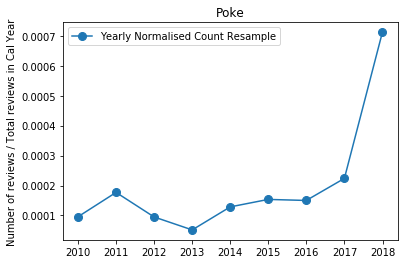

In [212]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Hawaiian_Poke_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Poke');

In [316]:
Sushi_Bars = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Sushi Bars') & (sub_cuisine_analysis.cuisine == 'Hawaiian')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Sushi_Bars_yearly = Sushi_Bars[data_columns].resample('A').sum()
Sushi_Bars_yearly.head(10)

,normalised review count
date,
2006-12-31,0.002622
2007-12-31,0.001636
2008-12-31,0.001227
2009-12-31,0.001196
2010-12-31,0.001089
2011-12-31,0.001208
2012-12-31,0.001106
2013-12-31,0.000883
2014-12-31,0.000831


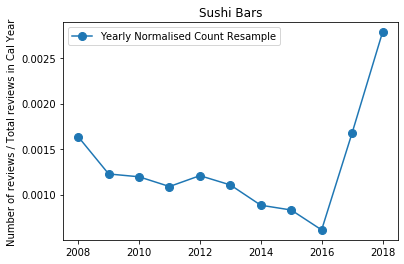

In [317]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Sushi_Bars_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Sushi Bars');

In [215]:
Barbeque = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Barbeque') & (sub_cuisine_analysis.cuisine == 'Hawaiian')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Barbeque_yearly = Barbeque[data_columns].resample('A').sum()
Barbeque_yearly.head(10)

,normalised review count
date,
2006-12-31,0.000000
2007-12-31,0.000109
2008-12-31,0.000041
2009-12-31,0.000048
2010-12-31,0.000054
2011-12-31,0.000052
2012-12-31,0.000103
2013-12-31,0.000061
2014-12-31,0.000031


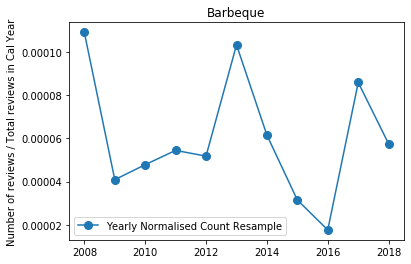

In [216]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Barbeque_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Barbeque');

In [217]:
Breakfast_Brunch = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Breakfast & Brunch') & (sub_cuisine_analysis.cuisine == 'Hawaiian')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Breakfast_Brunch_yearly = Breakfast_Brunch[data_columns].resample('A').sum()
Breakfast_Brunch_yearly.head(10)

,normalised review count
date,
2014-12-31,0.000079
2015-12-31,0.000053
2016-12-31,0.000036
2017-12-31,0.000028
2018-12-31,0.000021


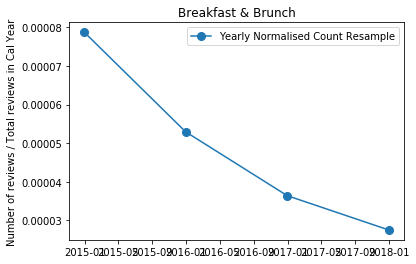

In [218]:
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Breakfast_Brunch_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Haiwaiian Breakfast & Brunch');

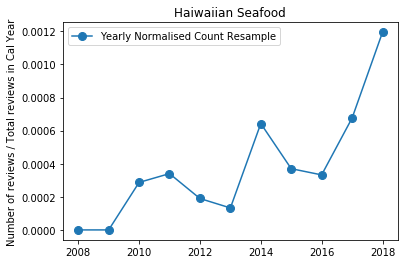

In [219]:
Seafood = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Seafood') & (sub_cuisine_analysis.cuisine == 'Hawaiian')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Seafood_yearly = Seafood[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Seafood_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Haiwaiian Seafood');

Now I am checking the number of reviews that contains the word 'poke' across all reviews. 

In [183]:
Poke = sub_cuisine_analysis
Poke ['Poke'] = pd.Series()
Poke.loc[Poke.text.str.contains('poke',case = False),'Poke'] = 1
Poke['Poke'].fillna(0, inplace=True)
Poke.head()

,business_id,name,address,city,state,avg_star,review_count,sub_cuisine,categories,cuisine,...,user_id,review_star,useful,funny,cool,text,number of reviews,total reviews in cal year,normalised review count,Poke
date,,,,,,,,,,,,,,,,,,,,,
2004-12-19 20:56:54,N2PlDjUJVfOJzsPzY0Au1w,China King Super Buffet,930 Tyvola Rd,Charlotte,NC,2.0,11,Buffets,"Restaurants, Chinese, Buffets",Chinese,...,62GNFh5FySkA3MbrQmnqvg,3.0,0,0,0,Not the best part of town. Not particularly g...,1,8,0.125,0.0
2004-12-19 20:47:24,ydUqgWsF3F27TbauOyib0w,Panda's Den,5724 E Wt Harris Blvd,Charlotte,NC,4.0,43,NaN,"Chinese, Restaurants",Chinese,...,62GNFh5FySkA3MbrQmnqvg,4.0,1,1,1,"Frequently busy due to their great food, but t...",1,8,0.125,0.0
2004-10-19 21:34:40,oYMsq2Xvzw6UbrIlMWjb-A,Papa John's Pizza,106 E Green St,Champaign,IL,2.5,29,Pizza,"Restaurants, Pizza",NaN,...,nkN_do3fJ9xekchVC-v68A,4.0,0,0,0,Love their pizza. They used to have a great ta...,1,8,0.125,0.0
2004-10-19 21:35:14,AtLv64FV-Pw6JuT3XUKU1g,Gumby's Pizza,1409 S Neil St,Champaign,IL,3.5,41,Pizza,"Food, Restaurants, Pizza",NaN,...,nkN_do3fJ9xekchVC-v68A,4.0,0,0,0,Pokey Sticks are the best!,1,8,0.125,1.0
2004-10-19 19:24:13,u8C8pRvaHXg3PgDrsUHJHQ,Papa Del's Pizza,1201 S Neil St,Champaign,IL,3.5,402,Pizza,"Food Delivery Services, Salad, Restaurants, Fo...",NaN,...,nkN_do3fJ9xekchVC-v68A,4.0,0,1,0,Good stuff. Pricey by normal pizza standards.,1,8,0.125,0.0


In [189]:
#normalise review count by dividing it by total number of reviews in the year
Poke.loc[:,'normalised review count'] = Poke['Poke']/Poke['total reviews in cal year']

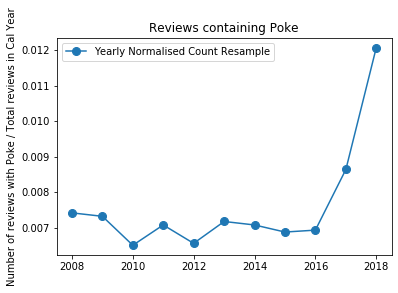

In [199]:
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Poke_yearly = Poke[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Poke_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews with Poke / Total reviews in Cal Year')
ax.legend()
plt.title('Reviews containing Poke');

### Korean Cuisine Analysis

Plotted trend of top 5 most frequent sub-categories and noted the following had an upward trend:
Bar, Fried Chicken, Barbeque, Fast Food 

In [208]:
# count number of each subcategory in Korean cuisine
Korean = sub_cuisine_analysis[sub_cuisine_analysis.cuisine == 'Korean']
Korean.sub_cuisine.value_counts()

Sushi Bars            6195
Buffets               4293
Barbeque              2769
Bars                  2730
Fast Food             1151
Chicken Wings          964
Breakfast & Brunch     684
Vegetarian             669
Seafood                493
Desserts               298
Ramen                  249
Cafes                  203
Hot Pot                152
Steakhouses             91
Food Stands             81
Salad                   62
Pizza                   32
Sandwiches              24
Street Vendors          18
Name: sub_cuisine, dtype: int64

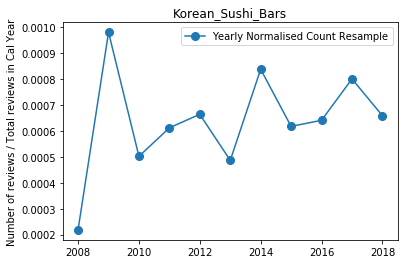

In [209]:
#plot sushi bars that are categorised as korean only 
Korean_Sushi_Bars = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Sushi Bars') & (sub_cuisine_analysis.cuisine == 'Korean')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Korean_Sushi_Bars_yearly = Korean_Sushi_Bars[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Korean_Sushi_Bars_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Korean_Sushi_Bars');

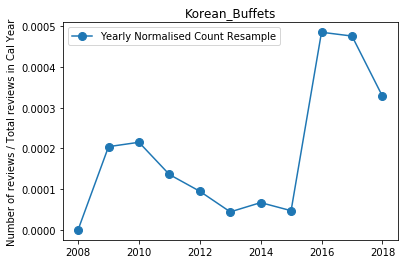

In [210]:
#plot Buffets that are categorised as korean only 
Korean_Buffets = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Buffets') & (sub_cuisine_analysis.cuisine == 'Korean')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Korean_Buffets_yearly = Korean_Buffets[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Korean_Buffets_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Korean_Buffets');

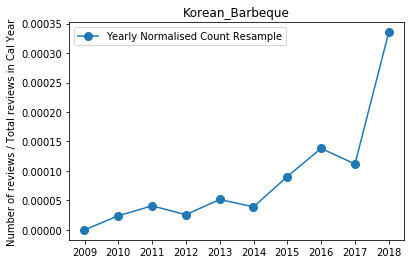

In [220]:
#plot Barbeque that are categorised as korean only 
Korean_Barbeque = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Barbeque') & (sub_cuisine_analysis.cuisine == 'Korean')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Korean_Barbeque_yearly = Korean_Barbeque[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Korean_Barbeque_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Korean_Barbeque');

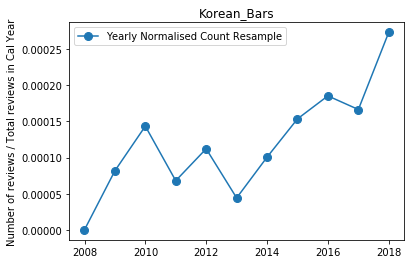

In [221]:
#plot Bars that are categorised as korean only 
Korean_Bars = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Bars') & (sub_cuisine_analysis.cuisine == 'Korean')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Korean_Bars_yearly = Korean_Bars[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Korean_Bars_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Korean_Bars');

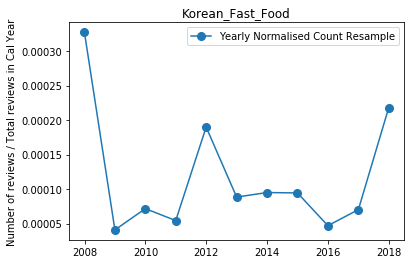

In [222]:
#plot Fast Food that are categorised as korean only 
Korean_Fast_Food = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Fast Food') & (sub_cuisine_analysis.cuisine == 'Korean')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Korean_Fast_Food_yearly = Korean_Fast_Food[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Korean_Fast_Food_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Korean_Fast_Food');

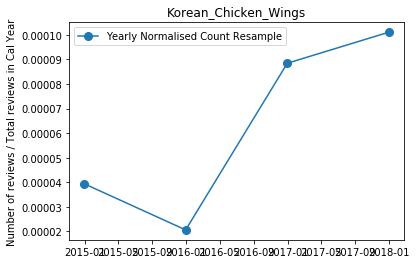

In [223]:
#plot Chicken Wings that are categorised as korean only 
Korean_Chicken_Wings = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Chicken Wings') & (sub_cuisine_analysis.cuisine == 'Korean')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Korean_Chicken_Wings_yearly = Korean_Chicken_Wings[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Korean_Chicken_Wings_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Korean_Chicken_Wings');

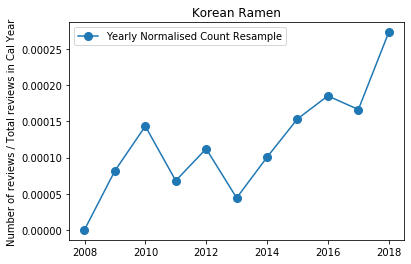

In [233]:
#plot Ramen that are categorised as korean only 
Korean_Ramen = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Ramen') & (sub_cuisine_analysis.cuisine == 'Korean')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Korean_Ramen_yearly = Korean_Ramen[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Korean_Bars_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Korean Ramen');

### Mexican Cuisine Analysis

Plotted trend of top 5 most frequent sub-categories and noted the following had an upward trend:
Bars, Taco

In [224]:
# count number of each subcategory in Mexican cuisine
Mexican = sub_cuisine_analysis[sub_cuisine_analysis.cuisine == 'Mexican']
Mexican.sub_cuisine.value_counts()

Bars                  46156
Breakfast & Brunch    25393
Fast Food             21460
Tacos                  8734
Tex Mex                7742
Seafood                7187
Burgers                5473
Latin American         5325
Caterers               3964
Specialty Food         3807
Cafes                  3306
Desserts               3217
Salad                  2086
Sushi Bars             2037
Sandwiches             1874
Food Stands            1377
Pizza                  1296
Steakhouses            1027
Caribbean              1020
Street Vendors          816
Barbeque                469
Buffets                 392
Comfort Food            382
Chicken Wings           310
Hot Dogs                276
Vegetarian              261
Gluten Free             160
Ethnic Food               4
Name: sub_cuisine, dtype: int64

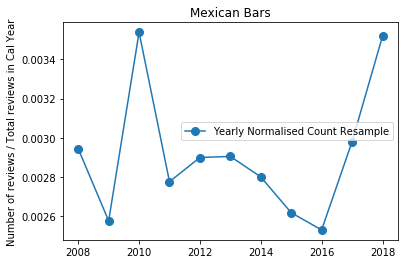

In [225]:
#plot bars that are categorised as Mexican only 
Mexican_Bars = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Bars') & (sub_cuisine_analysis.cuisine == 'Mexican')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Mexican_Bars_yearly = Mexican_Bars[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Mexican_Bars_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Mexican Bars');

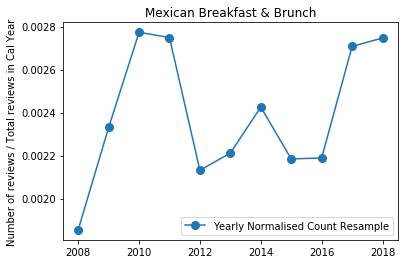

In [226]:
#plot bars that are categorised as Breakfast & Brunch only 
Mexican_Breakfast_Brunch = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Breakfast & Brunch') & (sub_cuisine_analysis.cuisine == 'Mexican')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Mexican_Breakfast_Brunch_yearly = Mexican_Breakfast_Brunch[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Mexican_Breakfast_Brunch_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Mexican Breakfast & Brunch');

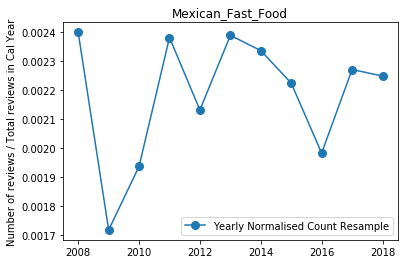

In [227]:
#plot Fast Food that are categorised as Mexican only 
Mexican_Fast_Food = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Fast Food') & (sub_cuisine_analysis.cuisine == 'Mexican')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Mexican_Fast_Food_yearly = Mexican_Fast_Food[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Mexican_Fast_Food_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Mexican_Fast_Food');

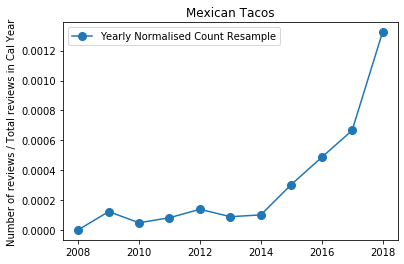

In [228]:
#plot Tacos that are categorised as Mexican only 
Mexican_Tacos = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Tacos') & (sub_cuisine_analysis.cuisine == 'Mexican')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Mexican_Tacos_yearly = Mexican_Tacos[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Mexican_Tacos_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Mexican Tacos');

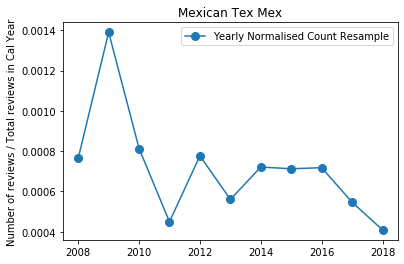

In [229]:
#plot Tex Mex that are categorised as Mexican only 
Mexican_Tex_Mex = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Tex Mex') & (sub_cuisine_analysis.cuisine == 'Mexican')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Mexican_Tex_Mex_yearly = Mexican_Tex_Mex[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Mexican_Tex_Mex_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Mexican Tex Mex');

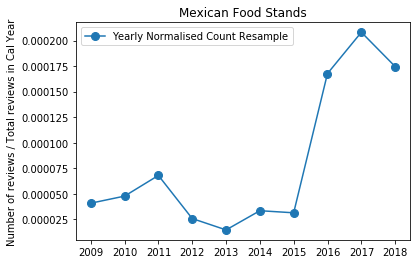

In [230]:
#plot Food Stands that are categorised as Mexican only 
Mexican_Food_Stands = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Food Stands') & (sub_cuisine_analysis.cuisine == 'Mexican')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Mexican_Food_Stands_yearly = Mexican_Food_Stands[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Mexican_Food_Stands_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Mexican Food Stands');

### Vegetarian/ Vegan Analysis

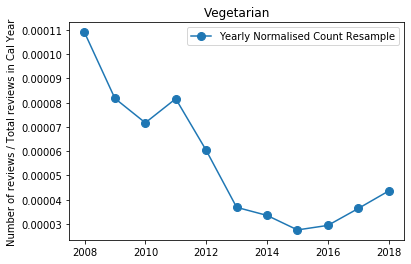

In [200]:
Vegetarian = sub_cuisine_analysis[sub_cuisine_analysis.sub_cuisine == 'Vegetarian']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Vegetarian_yearly = Vegetarian[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Vegetarian_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Vegetarian');

In [287]:
Vegetarian = sub_cuisine_analysis.copy(deep=True)
Vegetarian['Vegetarian'] = pd.Series()
Vegetarian.loc[Vegetarian.text.str.contains('vegetarian|vegan|veggie|[\s]veg[\s]',flags=re.IGNORECASE, regex=True),'Vegetarian'] = 1
Vegetarian['Vegetarian'].fillna(0, inplace=True)
Vegetarian.head()

,business_id,name,address,city,state,avg_star,review_count,sub_cuisine,categories,cuisine,...,user_id,review_star,useful,funny,cool,text,number of reviews,total reviews in cal year,normalised review count,Vegetarian
date,,,,,,,,,,,,,,,,,,,,,
2004-12-19 20:56:54,N2PlDjUJVfOJzsPzY0Au1w,China King Super Buffet,930 Tyvola Rd,Charlotte,NC,2.0,11,Buffets,"Restaurants, Chinese, Buffets",Chinese,...,62GNFh5FySkA3MbrQmnqvg,3.0,0,0,0,Not the best part of town. Not particularly g...,1,8,0.125,0.0
2004-12-19 20:47:24,ydUqgWsF3F27TbauOyib0w,Panda's Den,5724 E Wt Harris Blvd,Charlotte,NC,4.0,43,NaN,"Chinese, Restaurants",Chinese,...,62GNFh5FySkA3MbrQmnqvg,4.0,1,1,1,"Frequently busy due to their great food, but t...",1,8,0.125,0.0
2004-10-19 21:34:40,oYMsq2Xvzw6UbrIlMWjb-A,Papa John's Pizza,106 E Green St,Champaign,IL,2.5,29,Pizza,"Restaurants, Pizza",NaN,...,nkN_do3fJ9xekchVC-v68A,4.0,0,0,0,Love their pizza. They used to have a great ta...,1,8,0.125,0.0
2004-10-19 21:35:14,AtLv64FV-Pw6JuT3XUKU1g,Gumby's Pizza,1409 S Neil St,Champaign,IL,3.5,41,Pizza,"Food, Restaurants, Pizza",NaN,...,nkN_do3fJ9xekchVC-v68A,4.0,0,0,0,Pokey Sticks are the best!,1,8,0.125,0.0
2004-10-19 19:24:13,u8C8pRvaHXg3PgDrsUHJHQ,Papa Del's Pizza,1201 S Neil St,Champaign,IL,3.5,402,Pizza,"Food Delivery Services, Salad, Restaurants, Fo...",NaN,...,nkN_do3fJ9xekchVC-v68A,4.0,0,1,0,Good stuff. Pricey by normal pizza standards.,1,8,0.125,0.0


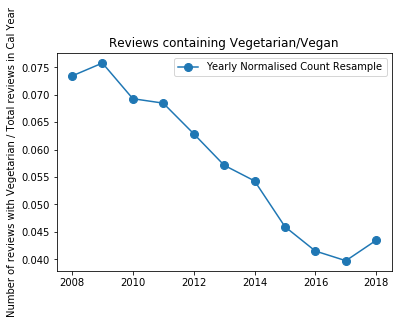

In [288]:
#normalise review count by dividing it by total number of reviews in the year
Vegetarian.loc[:,'normalised review count'] = Vegetarian['Vegetarian']/Vegetarian['total reviews in cal year']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Vegetarian_yearly = Vegetarian[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Vegetarian_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews with Vegetarian / Total reviews in Cal Year')
ax.legend()
plt.title('Reviews containing Vegetarian/Vegan');

## Analysis on number of reviews containing health related words 

In [290]:
Healthy = sub_cuisine_analysis.copy(deep=True)
Healthy ['Healthy'] = pd.Series()
Healthy.loc[Healthy.text.str.contains('Gluten-free| ethical| locally produced| wholesome| healthy| health| green| clean| organic| fresh',flags=re.IGNORECASE, regex=True),'Healthy'] = 1
Healthy['Healthy'].fillna(0, inplace=True)
Healthy.head()

,business_id,name,address,city,state,avg_star,review_count,sub_cuisine,categories,cuisine,...,user_id,review_star,useful,funny,cool,text,number of reviews,total reviews in cal year,normalised review count,Healthy
date,,,,,,,,,,,,,,,,,,,,,
2004-12-19 20:56:54,N2PlDjUJVfOJzsPzY0Au1w,China King Super Buffet,930 Tyvola Rd,Charlotte,NC,2.0,11,Buffets,"Restaurants, Chinese, Buffets",Chinese,...,62GNFh5FySkA3MbrQmnqvg,3.0,0,0,0,Not the best part of town. Not particularly g...,1,8,0.125,0.0
2004-12-19 20:47:24,ydUqgWsF3F27TbauOyib0w,Panda's Den,5724 E Wt Harris Blvd,Charlotte,NC,4.0,43,NaN,"Chinese, Restaurants",Chinese,...,62GNFh5FySkA3MbrQmnqvg,4.0,1,1,1,"Frequently busy due to their great food, but t...",1,8,0.125,0.0
2004-10-19 21:34:40,oYMsq2Xvzw6UbrIlMWjb-A,Papa John's Pizza,106 E Green St,Champaign,IL,2.5,29,Pizza,"Restaurants, Pizza",NaN,...,nkN_do3fJ9xekchVC-v68A,4.0,0,0,0,Love their pizza. They used to have a great ta...,1,8,0.125,0.0
2004-10-19 21:35:14,AtLv64FV-Pw6JuT3XUKU1g,Gumby's Pizza,1409 S Neil St,Champaign,IL,3.5,41,Pizza,"Food, Restaurants, Pizza",NaN,...,nkN_do3fJ9xekchVC-v68A,4.0,0,0,0,Pokey Sticks are the best!,1,8,0.125,0.0
2004-10-19 19:24:13,u8C8pRvaHXg3PgDrsUHJHQ,Papa Del's Pizza,1201 S Neil St,Champaign,IL,3.5,402,Pizza,"Food Delivery Services, Salad, Restaurants, Fo...",NaN,...,nkN_do3fJ9xekchVC-v68A,4.0,0,1,0,Good stuff. Pricey by normal pizza standards.,1,8,0.125,0.0


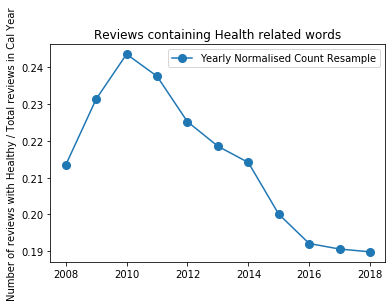

In [291]:
#normalise review count by dividing it by total number of reviews in the year
Healthy.loc[:,'normalised review count'] = Healthy['Healthy']/Healthy['total reviews in cal year']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Healthy_yearly = Healthy[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Healthy_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews with Healthy / Total reviews in Cal Year')
ax.legend()
plt.title('Reviews containing Health related words');

### Testing sub-cuisine based on an initial hypothesis - Ramen

In [293]:
#Confirm ramen is a Japanese cuisine
sub_cuisine_analysis[sub_cuisine_analysis.sub_cuisine == 'Ramen'].groupby(['sub_cuisine', 'cuisine']).size()

sub_cuisine  cuisine             
Ramen        Japanese                4969
             Japanese and Chinese     127
             Korean                   249
             Thai                     281
dtype: int64

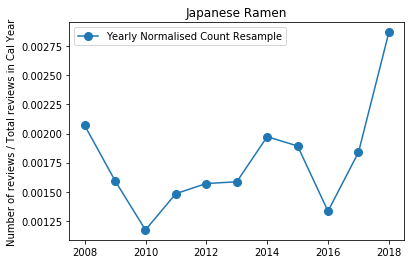

In [294]:
#plot Ramen that are categorised as Japanese only 
Japanese_Ramen = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Ramen') & (sub_cuisine_analysis.cuisine == 'Japanese')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Japanese_Ramen_yearly = Japanese_Ramen[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Japanese_Ramen_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Japanese Ramen');

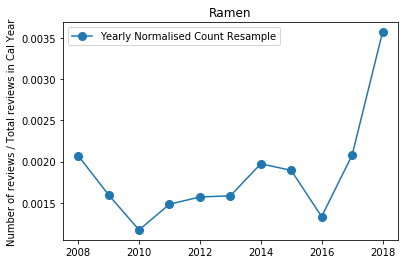

In [295]:
#plot Ramen 
Ramen = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Ramen')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Ramen_yearly = Ramen[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Ramen_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Ramen');

In [296]:
#reviews containing the word 'Ramen'
Review_with_Ramen = sub_cuisine_analysis.copy(deep = True)
Review_with_Ramen ['Review_with_Ramen'] = pd.Series()
Review_with_Ramen.loc[Review_with_Ramen.text.str.contains('ramen',flags=re.IGNORECASE, regex=True),'Review_with_Ramen'] = 1
Review_with_Ramen['Review_with_Ramen'].fillna(0, inplace=True)
Review_with_Ramen.head()

,business_id,name,address,city,state,avg_star,review_count,sub_cuisine,categories,cuisine,...,user_id,review_star,useful,funny,cool,text,number of reviews,total reviews in cal year,normalised review count,Review_with_Ramen
date,,,,,,,,,,,,,,,,,,,,,
2004-12-19 20:56:54,N2PlDjUJVfOJzsPzY0Au1w,China King Super Buffet,930 Tyvola Rd,Charlotte,NC,2.0,11,Buffets,"Restaurants, Chinese, Buffets",Chinese,...,62GNFh5FySkA3MbrQmnqvg,3.0,0,0,0,Not the best part of town. Not particularly g...,1,8,0.125,0.0
2004-12-19 20:47:24,ydUqgWsF3F27TbauOyib0w,Panda's Den,5724 E Wt Harris Blvd,Charlotte,NC,4.0,43,NaN,"Chinese, Restaurants",Chinese,...,62GNFh5FySkA3MbrQmnqvg,4.0,1,1,1,"Frequently busy due to their great food, but t...",1,8,0.125,0.0
2004-10-19 21:34:40,oYMsq2Xvzw6UbrIlMWjb-A,Papa John's Pizza,106 E Green St,Champaign,IL,2.5,29,Pizza,"Restaurants, Pizza",NaN,...,nkN_do3fJ9xekchVC-v68A,4.0,0,0,0,Love their pizza. They used to have a great ta...,1,8,0.125,0.0
2004-10-19 21:35:14,AtLv64FV-Pw6JuT3XUKU1g,Gumby's Pizza,1409 S Neil St,Champaign,IL,3.5,41,Pizza,"Food, Restaurants, Pizza",NaN,...,nkN_do3fJ9xekchVC-v68A,4.0,0,0,0,Pokey Sticks are the best!,1,8,0.125,0.0
2004-10-19 19:24:13,u8C8pRvaHXg3PgDrsUHJHQ,Papa Del's Pizza,1201 S Neil St,Champaign,IL,3.5,402,Pizza,"Food Delivery Services, Salad, Restaurants, Fo...",NaN,...,nkN_do3fJ9xekchVC-v68A,4.0,0,1,0,Good stuff. Pricey by normal pizza standards.,1,8,0.125,0.0


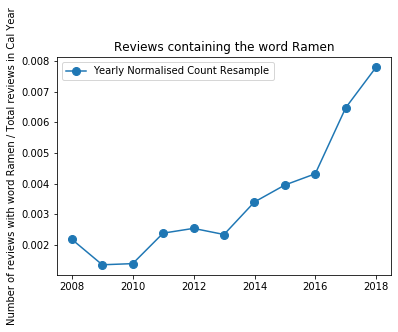

In [297]:
#normalise review count by dividing it by total number of reviews in the year
Review_with_Ramen.loc[:,'normalised review count'] = Review_with_Ramen['Review_with_Ramen']/Review_with_Ramen['total reviews in cal year']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Review_with_Ramen_yearly = Review_with_Ramen[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Review_with_Ramen_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews with word Ramen / Total reviews in Cal Year')
ax.legend()
plt.title('Reviews containing the word Ramen');

### Testing sub-cuisine based on an initial hypothesis - Bubble Tea

In [298]:
#Confirm Bubble Tea is mostly classified as Chinese and Vietnamese
sub_cuisine_analysis[sub_cuisine_analysis.sub_cuisine == 'Bubble Tea'].groupby(['sub_cuisine', 'cuisine']).size()

sub_cuisine  cuisine   
Bubble Tea   Chinese       272
             Japanese       51
             Thai           90
             Vietnamese    451
dtype: int64

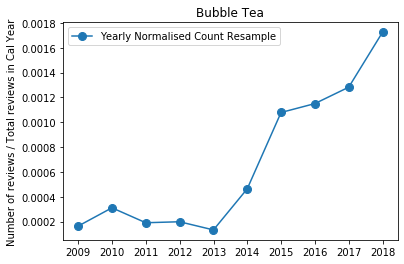

In [299]:
#plot Bubble Tea
Bubble_Tea = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Bubble Tea')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Bubble_Tea_yearly = Bubble_Tea[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Bubble_Tea_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Bubble Tea');

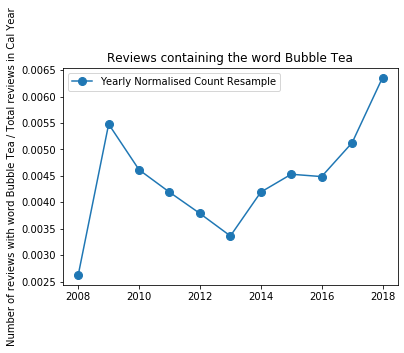

In [301]:
#reviews containing the word 'Bubble Tea'
Review_with_Bubble_Tea = sub_cuisine_analysis.copy(deep = True)
Review_with_Bubble_Tea ['Review_with_Bubble_Tea'] = pd.Series()
Review_with_Bubble_Tea.loc[Review_with_Bubble_Tea.text.str.contains('bubble tea |milk tea|boba|pearl',flags=re.IGNORECASE, regex=True),'Review_with_Bubble_Tea'] = 1
Review_with_Bubble_Tea['Review_with_Bubble_Tea'].fillna(0, inplace=True)
#normalise review count by dividing it by total number of reviews in the year
Review_with_Bubble_Tea.loc[:,'normalised review count'] = Review_with_Bubble_Tea['Review_with_Bubble_Tea']/Review_with_Bubble_Tea['total reviews in cal year']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Review_with_Bubble_Tea_yearly = Review_with_Bubble_Tea[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Review_with_Bubble_Tea_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews with word Bubble Tea / Total reviews in Cal Year')
ax.legend()
plt.title('Reviews containing the word Bubble Tea');

### Testing sub-cuisine based on an initial hypothesis - Hot Pot

In [302]:
#Hot Pot is mostly classified as Chinese and, Korean and Japanese 
sub_cuisine_analysis[sub_cuisine_analysis.sub_cuisine == 'Hot Pot'].groupby(['sub_cuisine', 'cuisine']).size()

sub_cuisine  cuisine 
Hot Pot      American      6
             Chinese     153
             Japanese    112
             Korean      152
dtype: int64

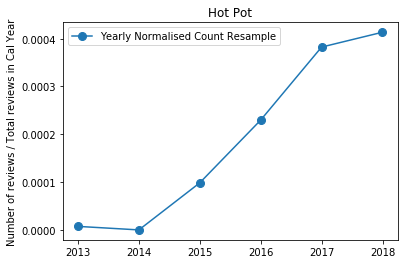

In [303]:
#plot Hot Pot 
Hot_Pot = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Hot Pot')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Hot_Pot_yearly = Hot_Pot[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Hot_Pot_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Hot Pot');

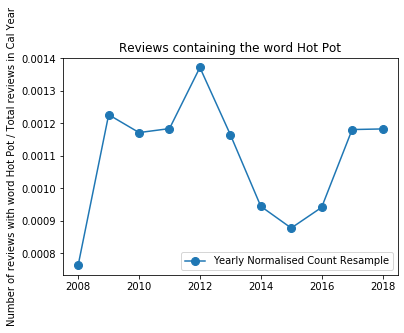

In [304]:
#reviews containing the word 'Hot Pot'
Review_with_Hot_Pot = sub_cuisine_analysis.copy(deep=True)
Review_with_Hot_Pot ['Review_with_Hot_Pot'] = pd.Series()
Review_with_Hot_Pot.loc[Review_with_Hot_Pot.text.str.contains('hot pot|hotpot|shabu shabu',flags=re.IGNORECASE, regex=True),'Review_with_Hot_Pot'] = 1
Review_with_Hot_Pot['Review_with_Hot_Pot'].fillna(0, inplace=True)
#normalise review count by dividing it by total number of reviews in the year
Review_with_Hot_Pot.loc[:,'normalised review count'] = Review_with_Hot_Pot['Review_with_Hot_Pot']/Review_with_Hot_Pot['total reviews in cal year']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Review_with_Hot_Pot_yearly = Review_with_Hot_Pot[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Review_with_Hot_Pot_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews with word Hot Pot / Total reviews in Cal Year')
ax.legend()
plt.title('Reviews containing the word Hot Pot');

### Testing sub-cuisine based on an initial hypothesis - Street Vendors

In [307]:
#Street Vendors is mostly classified as Mexican
sub_cuisine_analysis[sub_cuisine_analysis.sub_cuisine == 'Street Vendors'].groupby(['sub_cuisine', 'cuisine']).size()

sub_cuisine     cuisine      
Street Vendors  American          98
                Chinese            3
                Hawaiian          32
                Indian            19
                Italian           17
                Japanese          60
                Korean            18
                Mediterranean      5
                Mexican          816
                Thai              42
                Vietnamese        82
dtype: int64

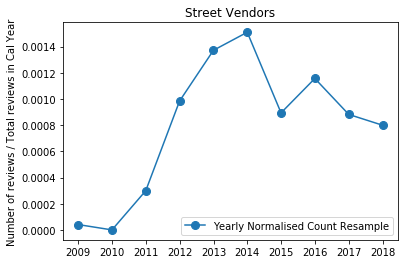

In [308]:
#plot Street Vendors
Street_Vendors = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Street Vendors')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Street_Vendors_yearly = Street_Vendors[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Street_Vendors_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Street Vendors');

### Testing sub-cuisine based on an initial hypothesis - Breakfast & Brunch

In [309]:
#Street Vendors is mostly classified as Mexican
sub_cuisine_analysis[sub_cuisine_analysis.sub_cuisine == 'Breakfast & Brunch'].groupby(['sub_cuisine', 'cuisine']).size()

sub_cuisine         cuisine             
Breakfast & Brunch  African                    117
                    American                171688
                    Chinese                    827
                    French                    8837
                    Greek                     4937
                    Hawaiian                   855
                    Indian                     774
                    Italian                  13202
                    Japanese                  2072
                    Japanese and Chinese       115
                    Korean                     684
                    Mediterranean             7047
                    Mexican                  25393
                    Spanish                   1062
                    Thai                       735
                    Vietnamese                 202
dtype: int64

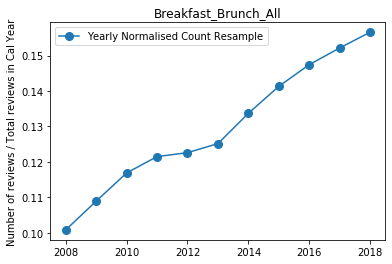

In [310]:
#plot Breakfast & Brunch
Breakfast_Brunch_All = sub_cuisine_analysis[sub_cuisine_analysis.sub_cuisine == 'Breakfast & Brunch']
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Breakfast_Brunch_All_yearly = Breakfast_Brunch_All[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Breakfast_Brunch_All_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Breakfast_Brunch_All');

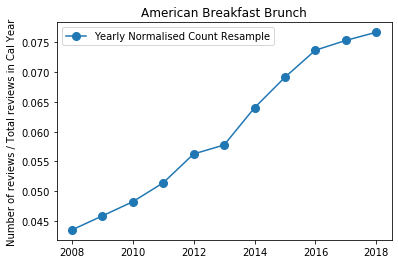

In [313]:
#plot American Breakfast & Brunch only
Breakfast_Brunch_American = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Breakfast & Brunch') & (sub_cuisine_analysis.cuisine == 'American')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Breakfast_Brunch_American_yearly = Breakfast_Brunch_American[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Breakfast_Brunch_American_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('American Breakfast Brunch');

In [ ]:
#plot Italian Breakfast & Brunch only
Breakfast_Brunch_Italian = sub_cuisine_analysis[(sub_cuisine_analysis.sub_cuisine == 'Breakfast & Brunch') & (sub_cuisine_analysis.cuisine == 'Italian')]
# Specify the data columns we want to include 
data_columns = ['normalised review count']
# Resample to weekly frequency, aggregating with mean
Breakfast_Brunch_Italian_yearly = Breakfast_Brunch_Italian[data_columns].resample('A').sum()
# Plot real time and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Breakfast_Brunch_Italian_yearly.loc[start:end, 'normalised review count'],
marker = 'o', markersize = 8,linestyle='-', label='Yearly Normalised Count Resample')
ax.set_ylabel('Number of reviews / Total reviews in Cal Year')
ax.legend()
plt.title('Italian Breakfast Brunch');